In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
orders = pd.read_csv('Orders_cleaned.csv')

In [80]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
Row.ID            51290 non-null int64
Order.ID          51290 non-null object
Order.Date        51290 non-null object
Ship.Date         51290 non-null object
Ship.Mode         51290 non-null object
Customer.ID       51290 non-null object
Customer.Name     51290 non-null object
Segment           51290 non-null object
Postal.Code       9994 non-null float64
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Region            51290 non-null object
Market            51290 non-null object
Product.ID        51290 non-null object
Category          51290 non-null object
Sub.Category      51290 non-null object
Product.Name      51290 non-null object
Sales             51290 non-null object
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null object
Shipping.Cos

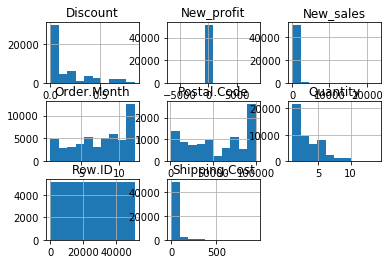

In [81]:
orders.hist()
plt.show()

In [82]:
returns = pd.read_csv('returns.csv')

In [83]:
returns.shape

(1079, 3)

In [84]:
orders.shape

(51290, 27)

In [85]:
final = orders.join(returns, lsuffix = 'Order.ID', rsuffix = 'Order ID')

In [86]:
final.shape

(51290, 30)

In [87]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 30 columns):
Row.ID            51290 non-null int64
Order.ID          51290 non-null object
Order.Date        51290 non-null object
Ship.Date         51290 non-null object
Ship.Mode         51290 non-null object
Customer.ID       51290 non-null object
Customer.Name     51290 non-null object
Segment           51290 non-null object
Postal.Code       9994 non-null float64
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
RegionOrder.ID    51290 non-null object
Market            51290 non-null object
Product.ID        51290 non-null object
Category          51290 non-null object
Sub.Category      51290 non-null object
Product.Name      51290 non-null object
Sales             51290 non-null object
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null object
Shipping.Cos

In [88]:
final['Returned'] = final['Returned'].fillna('No')

In [89]:
final['Returned'].unique()

array(['Yes', 'No'], dtype=object)

In [90]:
final['Ship.Date'] = pd.to_datetime(final['Ship.Date'])

In [91]:
final['Order.Date'] = pd.to_datetime(final['Order.Date'])

In [92]:
final['Process.Time'] = final['Ship.Date'] - final['Order.Date']

In [93]:
final['Process.Time'] = final['Process.Time'].astype(str)

In [94]:
final['Process.Time'] = final['Process.Time'].str.replace('days', '')

In [95]:
final['Process.Time'] = final['Process.Time'].str.replace('00:00:00.000000000', '')

In [96]:
final['Process.Time'] = final['Process.Time'].astype(int)

In [97]:
final.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'RegionOrder.ID', 'Market', 'Product.ID',
       'Category', 'Sub.Category', 'Product.Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping.Cost', 'Order.Priority', 'New_sales',
       'New_profit', 'Order.Month', 'Returned', 'Order ID', 'RegionOrder ID',
       'Process.Time'],
      dtype='object')

In [98]:
prod_return = final[final['Returned'] == 'Yes'].groupby(['Product.ID', 'Returned'], as_index = False)['Quantity'].sum()

In [99]:
prod_return = prod_return.drop(labels = 'Returned', axis = 1)

In [100]:
prod_return.columns = ['Product.ID', 'Return.Quantity']

In [101]:
prod_return.columns

Index(['Product.ID', 'Return.Quantity'], dtype='object')

In [102]:
order_final = final.merge(prod_return, how = 'left', on = 'Product.ID')

In [103]:
order_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 32 columns):
Row.ID             51290 non-null int64
Order.ID           51290 non-null object
Order.Date         51290 non-null datetime64[ns]
Ship.Date          51290 non-null datetime64[ns]
Ship.Mode          51290 non-null object
Customer.ID        51290 non-null object
Customer.Name      51290 non-null object
Segment            51290 non-null object
Postal.Code        9994 non-null float64
City               51290 non-null object
State              51290 non-null object
Country            51290 non-null object
RegionOrder.ID     51290 non-null object
Market             51290 non-null object
Product.ID         51290 non-null object
Category           51290 non-null object
Sub.Category       51290 non-null object
Product.Name       51290 non-null object
Sales              51290 non-null object
Quantity           51290 non-null int64
Discount           51290 non-null float64
Profit         

In [104]:
order_final['Return.Quantity'] = order_final['Return.Quantity'].fillna(0)

In [105]:
order_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 32 columns):
Row.ID             51290 non-null int64
Order.ID           51290 non-null object
Order.Date         51290 non-null datetime64[ns]
Ship.Date          51290 non-null datetime64[ns]
Ship.Mode          51290 non-null object
Customer.ID        51290 non-null object
Customer.Name      51290 non-null object
Segment            51290 non-null object
Postal.Code        9994 non-null float64
City               51290 non-null object
State              51290 non-null object
Country            51290 non-null object
RegionOrder.ID     51290 non-null object
Market             51290 non-null object
Product.ID         51290 non-null object
Category           51290 non-null object
Sub.Category       51290 non-null object
Product.Name       51290 non-null object
Sales              51290 non-null object
Quantity           51290 non-null int64
Discount           51290 non-null float64
Profit         

In [106]:
model_final = order_final[['Ship.Mode', 'Segment', 'RegionOrder.ID', 'Market', 'Category', 'Sub.Category', 'Quantity', 'Discount', 'Shipping.Cost', 'Order.Priority', 'New_sales', 'New_profit','Order.Month','Returned','Process.Time', 'Return.Quantity']]

In [107]:
model_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 16 columns):
Ship.Mode          51290 non-null object
Segment            51290 non-null object
RegionOrder.ID     51290 non-null object
Market             51290 non-null object
Category           51290 non-null object
Sub.Category       51290 non-null object
Quantity           51290 non-null int64
Discount           51290 non-null float64
Shipping.Cost      51290 non-null float64
Order.Priority     51290 non-null object
New_sales          51290 non-null float64
New_profit         51290 non-null float64
Order.Month        51290 non-null int64
Returned           51290 non-null object
Process.Time       51290 non-null int64
Return.Quantity    51290 non-null float64
dtypes: float64(5), int64(3), object(8)
memory usage: 6.7+ MB


In [108]:
model_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 16 columns):
Ship.Mode          51290 non-null object
Segment            51290 non-null object
RegionOrder.ID     51290 non-null object
Market             51290 non-null object
Category           51290 non-null object
Sub.Category       51290 non-null object
Quantity           51290 non-null int64
Discount           51290 non-null float64
Shipping.Cost      51290 non-null float64
Order.Priority     51290 non-null object
New_sales          51290 non-null float64
New_profit         51290 non-null float64
Order.Month        51290 non-null int64
Returned           51290 non-null object
Process.Time       51290 non-null int64
Return.Quantity    51290 non-null float64
dtypes: float64(5), int64(3), object(8)
memory usage: 6.7+ MB


In [137]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(model_final, test_size=0.2, random_state = 100)

In [138]:
train_return = train['Returned']

In [139]:
train = train.drop(labels = 'Returned', axis = 1)

In [140]:
test_return = test['Returned']

In [141]:
test = test.drop(labels = 'Returned', axis = 1)

In [142]:
model_train_dum = pd.get_dummies(train, drop_first = True)

In [143]:
model_test_dum = pd.get_dummies(test, drop_first = True)

In [144]:
model_train_dum.shape

(41032, 60)

In [145]:
model_test_dum.shape

(10258, 60)

In [146]:
test.shape

(10258, 15)

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41032 entries, 30197 to 38408
Data columns (total 15 columns):
Ship.Mode          41032 non-null object
Segment            41032 non-null object
RegionOrder.ID     41032 non-null object
Market             41032 non-null object
Category           41032 non-null object
Sub.Category       41032 non-null object
Quantity           41032 non-null int64
Discount           41032 non-null float64
Shipping.Cost      41032 non-null float64
Order.Priority     41032 non-null object
New_sales          41032 non-null float64
New_profit         41032 non-null float64
Order.Month        41032 non-null int64
Process.Time       41032 non-null int64
Return.Quantity    41032 non-null float64
dtypes: float64(5), int64(3), object(7)
memory usage: 5.0+ MB


In [148]:
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()
randomForest.fit(model_train_dum, train_return)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [149]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
randomForest = ensemble.RandomForestClassifier()
grid_para_forest = [{
   "n_estimators": [3, 5, 7, 9],
   "criterion": ["gini"],
   "min_samples_leaf": range(1, 10),
   "random_state": [100]}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_forest.fit(model_train_dum, train_return)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'min_samples_leaf': range(1, 10), 'n_estimators': [3, 5, 7, 9], 'criterion': ['gini'], 'random_state': [100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [150]:
grid_search_forest.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 4,
 'n_estimators': 9,
 'random_state': 100}

In [151]:
randomForest.set_params(criterion = 'gini', min_samples_leaf = 4, n_estimators = 9, random_state = 100)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=1, oob_score=False, random_state=100,
            verbose=0, warm_start=False)

In [152]:
randomForest.fit(model_train_dum, train_return)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=1, oob_score=False, random_state=100,
            verbose=0, warm_start=False)

In [153]:
y_pred = randomForest.predict(model_test_dum)

In [154]:
from sklearn.metrics import confusion_matrix

In [155]:
confusion_matrix(test_return, y_pred)

array([[10027,     0],
       [   46,   185]])